# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [2]:
RUN_ID = '0034'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('chimp')

## architecture

In [4]:
x_train.shape

(80000, 28, 28, 1)

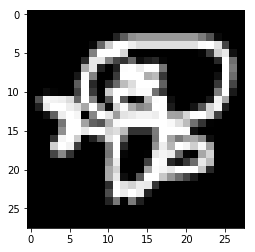

In [5]:
plt.imshow(x_train[0,:,:,0], cmap = 'gray')

In [6]:
np.min(x_train[0])

-1.0

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 14, 14, 128)       204928    
__________

## training

In [11]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [22]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

703 [D loss: (0.659)(R 0.602, F 0.716)] [D acc: (0.586)(0.672, 0.500)] [G loss: 0.757] [G acc: 0.250]
704 [D loss: (0.654)(R 0.587, F 0.722)] [D acc: (0.574)(0.688, 0.461)] [G loss: 0.742] [G acc: 0.312]
705 [D loss: (0.667)(R 0.608, F 0.725)] [D acc: (0.535)(0.586, 0.484)] [G loss: 0.737] [G acc: 0.289]
706 [D loss: (0.672)(R 0.609, F 0.735)] [D acc: (0.574)(0.664, 0.484)] [G loss: 0.732] [G acc: 0.289]
707 [D loss: (0.661)(R 0.609, F 0.713)] [D acc: (0.555)(0.648, 0.461)] [G loss: 0.754] [G acc: 0.297]
708 [D loss: (0.703)(R 0.613, F 0.793)] [D acc: (0.504)(0.617, 0.391)] [G loss: 0.746] [G acc: 0.289]
709 [D loss: (0.694)(R 0.595, F 0.792)] [D acc: (0.586)(0.703, 0.469)] [G loss: 0.751] [G acc: 0.297]
710 [D loss: (0.657)(R 0.625, F 0.689)] [D acc: (0.605)(0.648, 0.562)] [G loss: 0.759] [G acc: 0.219]
711 [D loss: (0.661)(R 0.601, F 0.720)] [D acc: (0.555)(0.648, 0.461)] [G loss: 0.762] [G acc: 0.250]
712 [D loss: (0.669)(R 0.579, F 0.758)] [D acc: (0.547)(0.680, 0.414)] [G loss: 0.

784 [D loss: (0.666)(R 0.610, F 0.723)] [D acc: (0.543)(0.586, 0.500)] [G loss: 0.746] [G acc: 0.250]
785 [D loss: (0.686)(R 0.587, F 0.785)] [D acc: (0.574)(0.680, 0.469)] [G loss: 0.772] [G acc: 0.242]
786 [D loss: (0.667)(R 0.628, F 0.705)] [D acc: (0.523)(0.562, 0.484)] [G loss: 0.748] [G acc: 0.242]
787 [D loss: (0.681)(R 0.593, F 0.769)] [D acc: (0.531)(0.586, 0.477)] [G loss: 0.771] [G acc: 0.266]
788 [D loss: (0.630)(R 0.616, F 0.643)] [D acc: (0.684)(0.648, 0.719)] [G loss: 0.765] [G acc: 0.328]
789 [D loss: (0.682)(R 0.621, F 0.742)] [D acc: (0.551)(0.586, 0.516)] [G loss: 0.769] [G acc: 0.195]
790 [D loss: (0.639)(R 0.567, F 0.711)] [D acc: (0.555)(0.594, 0.516)] [G loss: 0.753] [G acc: 0.242]
791 [D loss: (0.646)(R 0.579, F 0.713)] [D acc: (0.598)(0.672, 0.523)] [G loss: 0.759] [G acc: 0.203]
792 [D loss: (0.699)(R 0.577, F 0.820)] [D acc: (0.492)(0.633, 0.352)] [G loss: 0.738] [G acc: 0.250]
793 [D loss: (0.647)(R 0.614, F 0.681)] [D acc: (0.621)(0.609, 0.633)] [G loss: 0.

865 [D loss: (0.628)(R 0.556, F 0.700)] [D acc: (0.598)(0.688, 0.508)] [G loss: 0.758] [G acc: 0.281]
866 [D loss: (0.643)(R 0.583, F 0.704)] [D acc: (0.602)(0.641, 0.562)] [G loss: 0.838] [G acc: 0.297]
867 [D loss: (0.660)(R 0.609, F 0.711)] [D acc: (0.598)(0.641, 0.555)] [G loss: 0.799] [G acc: 0.156]
868 [D loss: (0.650)(R 0.557, F 0.743)] [D acc: (0.602)(0.688, 0.516)] [G loss: 0.757] [G acc: 0.258]
869 [D loss: (0.672)(R 0.570, F 0.773)] [D acc: (0.574)(0.688, 0.461)] [G loss: 0.773] [G acc: 0.273]
870 [D loss: (0.681)(R 0.630, F 0.732)] [D acc: (0.555)(0.586, 0.523)] [G loss: 0.744] [G acc: 0.344]
871 [D loss: (0.664)(R 0.560, F 0.768)] [D acc: (0.594)(0.695, 0.492)] [G loss: 0.738] [G acc: 0.344]
872 [D loss: (0.677)(R 0.578, F 0.776)] [D acc: (0.602)(0.688, 0.516)] [G loss: 0.751] [G acc: 0.297]
873 [D loss: (0.639)(R 0.573, F 0.704)] [D acc: (0.605)(0.656, 0.555)] [G loss: 0.730] [G acc: 0.383]
874 [D loss: (0.704)(R 0.582, F 0.826)] [D acc: (0.543)(0.633, 0.453)] [G loss: 0.

946 [D loss: (0.653)(R 0.592, F 0.714)] [D acc: (0.562)(0.633, 0.492)] [G loss: 0.753] [G acc: 0.328]
947 [D loss: (0.660)(R 0.588, F 0.732)] [D acc: (0.613)(0.680, 0.547)] [G loss: 0.785] [G acc: 0.266]
948 [D loss: (0.651)(R 0.620, F 0.682)] [D acc: (0.605)(0.570, 0.641)] [G loss: 0.798] [G acc: 0.258]
949 [D loss: (0.682)(R 0.599, F 0.764)] [D acc: (0.605)(0.703, 0.508)] [G loss: 0.793] [G acc: 0.211]
950 [D loss: (0.666)(R 0.634, F 0.698)] [D acc: (0.590)(0.531, 0.648)] [G loss: 0.771] [G acc: 0.266]
951 [D loss: (0.701)(R 0.617, F 0.784)] [D acc: (0.543)(0.594, 0.492)] [G loss: 0.791] [G acc: 0.234]
952 [D loss: (0.626)(R 0.587, F 0.666)] [D acc: (0.664)(0.656, 0.672)] [G loss: 0.781] [G acc: 0.297]
953 [D loss: (0.660)(R 0.588, F 0.732)] [D acc: (0.621)(0.656, 0.586)] [G loss: 0.772] [G acc: 0.266]
954 [D loss: (0.647)(R 0.608, F 0.687)] [D acc: (0.625)(0.648, 0.602)] [G loss: 0.759] [G acc: 0.273]
955 [D loss: (0.657)(R 0.586, F 0.728)] [D acc: (0.613)(0.641, 0.586)] [G loss: 0.

1027 [D loss: (0.660)(R 0.606, F 0.714)] [D acc: (0.605)(0.656, 0.555)] [G loss: 0.759] [G acc: 0.359]
1028 [D loss: (0.638)(R 0.553, F 0.722)] [D acc: (0.648)(0.688, 0.609)] [G loss: 0.797] [G acc: 0.250]
1029 [D loss: (0.650)(R 0.599, F 0.701)] [D acc: (0.641)(0.656, 0.625)] [G loss: 0.780] [G acc: 0.344]
1030 [D loss: (0.661)(R 0.583, F 0.740)] [D acc: (0.543)(0.602, 0.484)] [G loss: 0.782] [G acc: 0.227]
1031 [D loss: (0.661)(R 0.639, F 0.683)] [D acc: (0.574)(0.547, 0.602)] [G loss: 0.774] [G acc: 0.273]
1032 [D loss: (0.646)(R 0.599, F 0.693)] [D acc: (0.609)(0.656, 0.562)] [G loss: 0.797] [G acc: 0.227]
1033 [D loss: (0.647)(R 0.569, F 0.725)] [D acc: (0.613)(0.625, 0.602)] [G loss: 0.791] [G acc: 0.242]
1034 [D loss: (0.673)(R 0.580, F 0.765)] [D acc: (0.582)(0.656, 0.508)] [G loss: 0.784] [G acc: 0.180]
1035 [D loss: (0.656)(R 0.607, F 0.705)] [D acc: (0.660)(0.664, 0.656)] [G loss: 0.791] [G acc: 0.297]
1036 [D loss: (0.651)(R 0.594, F 0.708)] [D acc: (0.641)(0.664, 0.617)] [

1107 [D loss: (0.690)(R 0.647, F 0.734)] [D acc: (0.590)(0.570, 0.609)] [G loss: 0.821] [G acc: 0.156]
1108 [D loss: (0.622)(R 0.540, F 0.705)] [D acc: (0.641)(0.719, 0.562)] [G loss: 0.801] [G acc: 0.219]
1109 [D loss: (0.657)(R 0.619, F 0.694)] [D acc: (0.617)(0.578, 0.656)] [G loss: 0.775] [G acc: 0.250]
1110 [D loss: (0.651)(R 0.610, F 0.692)] [D acc: (0.574)(0.586, 0.562)] [G loss: 0.806] [G acc: 0.172]
1111 [D loss: (0.633)(R 0.561, F 0.705)] [D acc: (0.629)(0.625, 0.633)] [G loss: 0.840] [G acc: 0.133]
1112 [D loss: (0.645)(R 0.635, F 0.655)] [D acc: (0.637)(0.586, 0.688)] [G loss: 0.803] [G acc: 0.258]
1113 [D loss: (0.635)(R 0.567, F 0.703)] [D acc: (0.609)(0.641, 0.578)] [G loss: 0.842] [G acc: 0.156]
1114 [D loss: (0.651)(R 0.569, F 0.732)] [D acc: (0.648)(0.633, 0.664)] [G loss: 0.808] [G acc: 0.250]
1115 [D loss: (0.681)(R 0.643, F 0.719)] [D acc: (0.562)(0.570, 0.555)] [G loss: 0.804] [G acc: 0.266]
1116 [D loss: (0.639)(R 0.603, F 0.675)] [D acc: (0.656)(0.625, 0.688)] [

1187 [D loss: (0.679)(R 0.600, F 0.758)] [D acc: (0.609)(0.633, 0.586)] [G loss: 0.812] [G acc: 0.234]
1188 [D loss: (0.623)(R 0.560, F 0.686)] [D acc: (0.656)(0.695, 0.617)] [G loss: 0.777] [G acc: 0.266]
1189 [D loss: (0.644)(R 0.580, F 0.708)] [D acc: (0.633)(0.641, 0.625)] [G loss: 0.818] [G acc: 0.211]
1190 [D loss: (0.654)(R 0.608, F 0.699)] [D acc: (0.617)(0.586, 0.648)] [G loss: 0.831] [G acc: 0.172]
1191 [D loss: (0.650)(R 0.610, F 0.691)] [D acc: (0.574)(0.539, 0.609)] [G loss: 0.815] [G acc: 0.188]
1192 [D loss: (0.657)(R 0.626, F 0.689)] [D acc: (0.613)(0.570, 0.656)] [G loss: 0.812] [G acc: 0.234]
1193 [D loss: (0.666)(R 0.609, F 0.722)] [D acc: (0.598)(0.625, 0.570)] [G loss: 0.795] [G acc: 0.273]
1194 [D loss: (0.648)(R 0.607, F 0.690)] [D acc: (0.664)(0.633, 0.695)] [G loss: 0.826] [G acc: 0.180]
1195 [D loss: (0.651)(R 0.630, F 0.672)] [D acc: (0.633)(0.578, 0.688)] [G loss: 0.831] [G acc: 0.117]
1196 [D loss: (0.648)(R 0.607, F 0.689)] [D acc: (0.602)(0.594, 0.609)] [

1267 [D loss: (0.647)(R 0.574, F 0.721)] [D acc: (0.637)(0.664, 0.609)] [G loss: 0.833] [G acc: 0.234]
1268 [D loss: (0.606)(R 0.563, F 0.650)] [D acc: (0.652)(0.633, 0.672)] [G loss: 0.853] [G acc: 0.211]
1269 [D loss: (0.649)(R 0.571, F 0.727)] [D acc: (0.598)(0.672, 0.523)] [G loss: 0.861] [G acc: 0.164]
1270 [D loss: (0.641)(R 0.584, F 0.697)] [D acc: (0.598)(0.602, 0.594)] [G loss: 0.860] [G acc: 0.172]
1271 [D loss: (0.631)(R 0.580, F 0.683)] [D acc: (0.672)(0.641, 0.703)] [G loss: 0.800] [G acc: 0.336]
1272 [D loss: (0.637)(R 0.559, F 0.714)] [D acc: (0.645)(0.688, 0.602)] [G loss: 0.871] [G acc: 0.219]
1273 [D loss: (0.637)(R 0.615, F 0.658)] [D acc: (0.602)(0.578, 0.625)] [G loss: 0.841] [G acc: 0.211]
1274 [D loss: (0.603)(R 0.560, F 0.645)] [D acc: (0.672)(0.633, 0.711)] [G loss: 0.902] [G acc: 0.211]
1275 [D loss: (0.627)(R 0.547, F 0.706)] [D acc: (0.652)(0.672, 0.633)] [G loss: 0.877] [G acc: 0.203]
1276 [D loss: (0.607)(R 0.567, F 0.647)] [D acc: (0.656)(0.648, 0.664)] [

KeyboardInterrupt: 

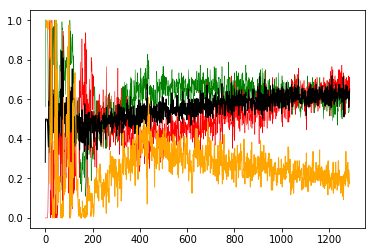

In [26]:


plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.5)
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=1)

plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=1)


